In [49]:
# Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score

# To hide the warning
import warnings
warnings.filterwarnings("ignore")

In [85]:
# load the datasource
df = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/data_retail.csv', sep=';')

In [51]:
# overview the dataframe
df.head()

,no,Row_Num,Customer_ID,Product,First_Transaction,Last_Transaction,Average_Transaction_Amount,Count_Transaction
0,1,1,29531,Jaket,1466304274396,1538718482608,1467681,22
1,2,2,29531,Sepatu,1406077331494,1545735761270,1269337,41
2,3,3,141526,Tas,1493349147000,1548322802000,310915,30
3,4,4,141526,Jaket,1493362372547,1547643603911,722632,27
4,5,5,37545,Sepatu,1429178498531,1542891221530,1775036,25


In [52]:
# understanding the data structure
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 8 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   no                          100000 non-null  int64 
 1   Row_Num                     100000 non-null  int64 
 2   Customer_ID                 100000 non-null  int64 
 3   Product                     100000 non-null  object
 4   First_Transaction           100000 non-null  int64 
 5   Last_Transaction            100000 non-null  int64 
 6   Average_Transaction_Amount  100000 non-null  int64 
 7   Count_Transaction           100000 non-null  int64 
dtypes: int64(7), object(1)
memory usage: 6.1+ MB


### Data Cleansing
______

In [90]:
# Delete unnecessary columns:
del df['no']
del df['Row_Num']

In [87]:
# translate the product records
df['Product'] = df['Product'].replace({'Baju':'Clothes', 'Tas':'Bag', 'Sepatu':'Shoes', 'Jaket':'Jacket'})

In [ ]:
# Change data type

df['First_Transaction'] = pd.to_datetime(df['First_Transaction']/1000, unit='s', origin='1970-01-01')
df['Last_Transaction'] = pd.to_datetime(df['Last_Transaction']/1000, unit='s', origin='1970-01-01')


In [92]:
df.head()

,Customer_ID,Product,First_Transaction,Last_Transaction,Average_Transaction_Amount,Count_Transaction
0,29531,Jacket,2016-06-19 02:44:34.396000000,2018-10-05 05:48:02.608000000,1467681,22
1,29531,Shoes,2014-07-23 01:02:11.493999872,2018-12-25 11:02:41.269999872,1269337,41
2,141526,Bag,2017-04-28 03:12:27.000000000,2019-01-24 09:40:02.000000000,310915,30
3,141526,Jacket,2017-04-28 06:52:52.546999808,2019-01-16 13:00:03.911000064,722632,27
4,37545,Shoes,2015-04-16 10:01:38.530999808,2018-11-22 12:53:41.529999872,1775036,25


In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 8 columns):
 #   Column                      Non-Null Count   Dtype         
---  ------                      --------------   -----         
 0   no                          100000 non-null  int64         
 1   Row_Num                     100000 non-null  int64         
 2   Customer_ID                 100000 non-null  int64         
 3   Product                     100000 non-null  object        
 4   First_Transaction           100000 non-null  datetime64[ns]
 5   Last_Transaction            100000 non-null  datetime64[ns]
 6   Average_Transaction_Amount  100000 non-null  int64         
 7   Count_Transaction           100000 non-null  int64         
dtypes: datetime64[ns](2), int64(5), object(1)
memory usage: 6.1+ MB


> Determining Customer Churn
> - When was the most recent transaction carried out
> - Classify customers who have churn status and those who don't

In [56]:
# Pengecekan transaksaksi terakhir dalam dataset
print(max(df['Last_Transaction']))

2019-02-01 23:57:57.286000128


In [94]:
# Klasifikasikan customer yang berstatus churn atau tidak dengan boolean
df.loc[(df['Last_Transaction'] <= '2018-08-01'), 'is_churn'] = True
df.loc[(df['Last_Transaction'] > '2018-08-01'), 'is_churn'] = False

In [95]:
print('Top 5 data:')
df.head()

Top 5 data:


,Customer_ID,Product,First_Transaction,Last_Transaction,Average_Transaction_Amount,Count_Transaction,is_churn
0,29531,Jacket,2016-06-19 02:44:34.396000000,2018-10-05 05:48:02.608000000,1467681,22,False
1,29531,Shoes,2014-07-23 01:02:11.493999872,2018-12-25 11:02:41.269999872,1269337,41,False
2,141526,Bag,2017-04-28 03:12:27.000000000,2019-01-24 09:40:02.000000000,310915,30,False
3,141526,Jacket,2017-04-28 06:52:52.546999808,2019-01-16 13:00:03.911000064,722632,27,False
4,37545,Shoes,2015-04-16 10:01:38.530999808,2018-11-22 12:53:41.529999872,1775036,25,False


In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 7 columns):
 #   Column                      Non-Null Count   Dtype         
---  ------                      --------------   -----         
 0   Customer_ID                 100000 non-null  int64         
 1   Product                     100000 non-null  object        
 2   First_Transaction           100000 non-null  datetime64[ns]
 3   Last_Transaction            100000 non-null  datetime64[ns]
 4   Average_Transaction_Amount  100000 non-null  int64         
 5   Count_Transaction           100000 non-null  int64         
 6   is_churn                    100000 non-null  object        
dtypes: datetime64[ns](2), int64(3), object(2)
memory usage: 5.3+ MB


### Explatory Data Analysis
_____

> __Trend of Customer Acquisition by Year__ <br><br>
    The "Trend of Customer Acquisition by Year" refers to the pattern or evolution of acquiring new customers over different years. Analyzing this trend can provide valuable insights into how a business has been successful in attracting and gaining new customers over time.

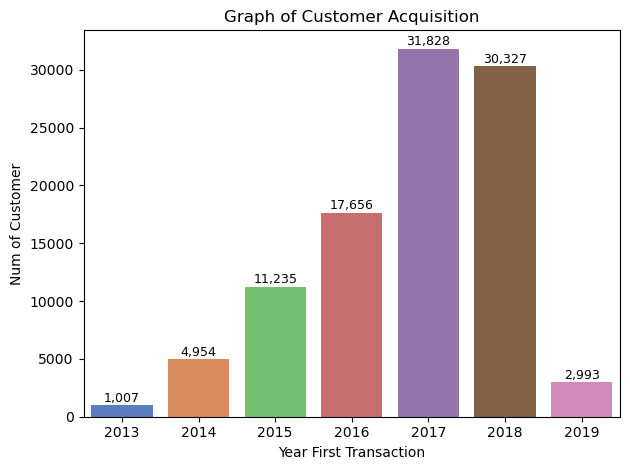

In [97]:
# before create the visualizations we will add new features
df['Year_First_Transaction'] = df['First_Transaction'].dt.year
df['Year_Last_Transaction'] = df['Last_Transaction'].dt.year
df_year = df.groupby(['Year_First_Transaction'])['Customer_ID'].count()

# Plotting
ax = sns.barplot(x='Year_First_Transaction', y='Customer_ID', data=df_year.reset_index(), palette='muted')
for p in ax.patches:
    ax.annotate(f'{p.get_height():,.0f}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 5), textcoords='offset points', fontsize=9)
plt.title('Graph of Customer Acquisition')
plt.xlabel('Year First Transaction')
plt.ylabel('Num of Customer')
plt.tight_layout()
plt.show()

- The largest customer acquisition occurred in 2017 amounting to 31,828. 
- The lowest customer acquisition occurred in 2013 only amounting to 1,007. 

____

> __Transaction by Year__ <br><br>
    The analysis of "Transaction by Year" involves examining the number of transactions conducted by customers in different years. This exploration provides insights into the transactional behavior over time, helping businesses understand the dynamics of customer engagement and potentially identify patterns or trends

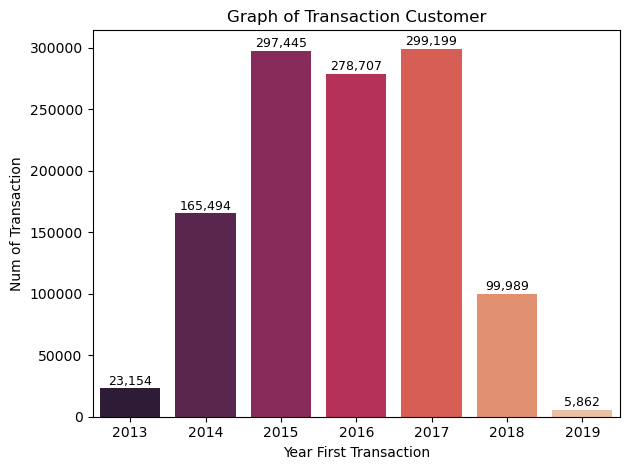

In [62]:
plt.clf()
df_year_tr = df.groupby(['Year_First_Transaction'])['Count_Transaction'].sum().reset_index()

# Plotting
ax = sns.barplot(x='Year_First_Transaction', y='Count_Transaction', data=df_year_tr, palette='rocket')
for p in ax.patches:
    ax.annotate(f'{p.get_height():,.0f}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0,5), textcoords='offset points', fontsize=9)

plt.title('Graph of Transaction Customer')
plt.xlabel('Year First Transaction')
plt.ylabel('Num of Transaction')
plt.tight_layout()
plt.show()

> __Average Transaction Amount by Year__ <br><br>
This analysis offers insights into the changing dynamics of customer spending behavior and provides a nuanced understanding of trends in transaction values.

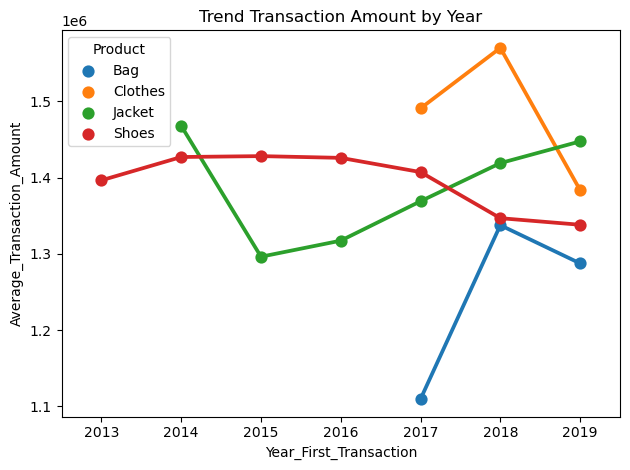

In [98]:
plt.clf()
sns.pointplot(data = df.groupby(['Product', 'Year_First_Transaction']).mean().reset_index(), 
              x='Year_First_Transaction', 
              y='Average_Transaction_Amount', 
              hue='Product')
plt.title('Trend Transaction Amount by Year')
plt.tight_layout()
plt.show()

- 

______

> __Proportion of churned customers for each product__ <br><br>
The analysis of the percentage or proportion of customers who have stopped using or purchasing a product (churned) within each specific product category. This analysis involves understanding the churn rate—how many customers, expressed as a percentage, have disengaged from a particular product.

<Figure size 640x480 with 0 Axes>

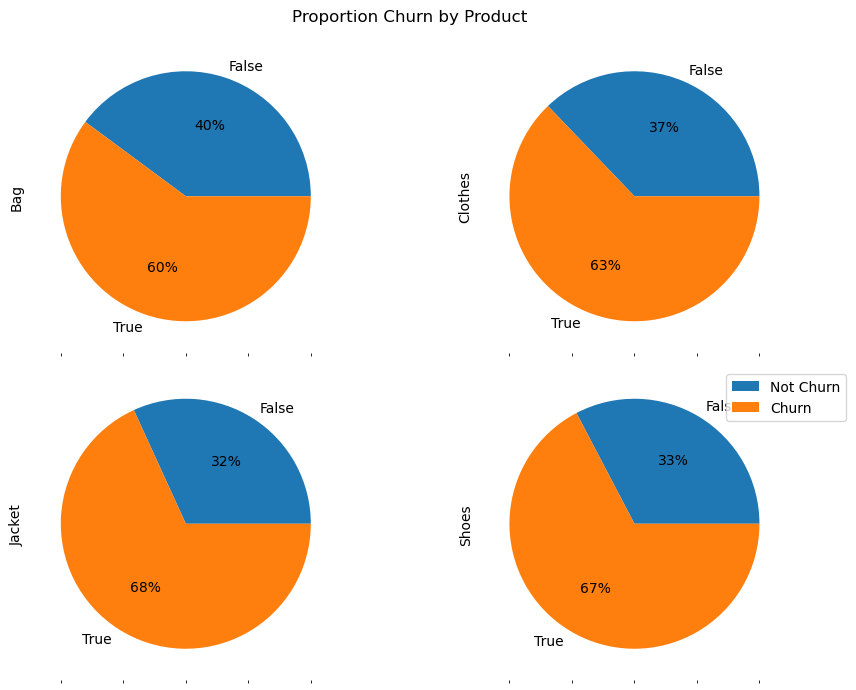

In [99]:
# Churn categorization
df.loc[df['Last_Transaction'] <= '2018-08-01', 'is_churn'] = True 
df.loc[df['Last_Transaction'] > '2018-08-01', 'is_churn'] = False 

plt.clf()
# Pivot data with pivot_table
df_piv = df.pivot_table(index='is_churn', 
                        columns='Product',
                        values='Customer_ID', 
                        aggfunc='count', 
                        fill_value=0)

# Get proportion churn by product
plot_product = df_piv.count().sort_values(ascending=False).head(5).index

# Plotting
df_piv = df_piv.reindex(columns=plot_product)
df_piv.plot.pie(subplots=True,
                figsize=(10, 7),
                layout=(-1, 2),
                autopct='%1.0f%%',
                legend=False,
                title='Proportion Churn by Product'
                )
legend_labels = ['Not Churn', 'Churn']
plt.legend(legend_labels, loc='upper right', bbox_to_anchor=(1.2,1))
plt.tight_layout()
plt.show()

- Jackets are the product with the highest proportion of churn among the other three products at 68%. Meanwhile, bags are the product with the lowest churn proportion at 60%.

__________

> __Distribution of transaction count categorization__ <br><br>
The analysis that examines how the count of transactions is distributed across different categories or groups. In this context, the transactions are categorized or grouped based on certain criteria, and the analysis explores the distribution of transaction counts within each category.

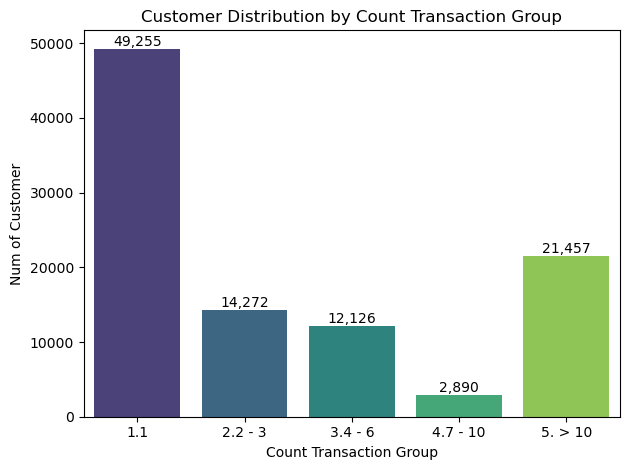

In [80]:
plt.clf()
# Categorization of transaction amounts
def func(row):
    if row['Count_Transaction'] == 1:
        val = '1.1'
    elif (row['Count_Transaction'] > 1 and row['Count_Transaction'] <= 3):
        val ='2.2 - 3'
    elif (row['Count_Transaction'] > 3 and row['Count_Transaction'] <= 6):
        val ='3.4 - 6'
    elif (row['Count_Transaction'] > 6 and row['Count_Transaction'] <= 10):
        val ='4.7 - 10'
    else:
        val ='5. > 10'
    return val

# Add new feature
df['Count_Transaction_Group'] = df.apply(func, axis=1)

# Plotting
df_year = df.groupby(['Count_Transaction_Group'])['Customer_ID'].count().reset_index()
ax = sns.barplot(x='Count_Transaction_Group', y='Customer_ID', data=df_year, palette='viridis')
for p in ax.patches:
    ax.annotate(f'{p.get_height():,.0f}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 5), textcoords='offset points', fontsize=10)
plt.title('Customer Distribution by Count Transaction Group')
plt.xlabel('Count Transaction Group')
plt.ylabel('Num of Customer')
plt.tight_layout()
plt.show()

- the highest Customer Distribution by Count Transaction Group is 1.1 with 49,255 customers. While the lowest is in group 4.7 - 10 with only 2,890 customers.

__________

> __Distribution of average transaction amount categorization__ <br><br>
The analysis that examines how the average transaction amounts are distributed across different categories or groups. In this context, transactions are categorized or grouped based on certain criteria, and the analysis explores the distribution of average transaction amounts within each category.

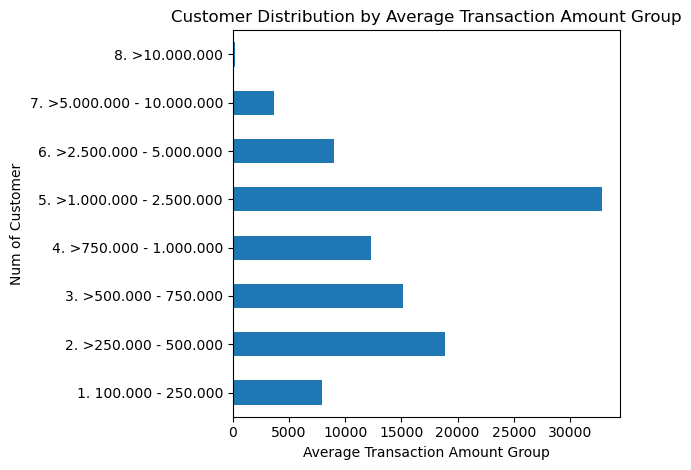

In [81]:
plt.clf()
# Categorization of average transaction size
def f(row):
    if (row['Average_Transaction_Amount'] >= 100000 and row['Average_Transaction_Amount'] <= 250000):
        val ='1. 100.000 - 250.000'
    elif (row['Average_Transaction_Amount'] > 250000 and row['Average_Transaction_Amount'] <= 500000):
        val ='2. >250.000 - 500.000'
    elif (row['Average_Transaction_Amount'] > 500000 and row['Average_Transaction_Amount'] <= 750000):
        val ='3. >500.000 - 750.000'
    elif (row['Average_Transaction_Amount'] > 750000 and row['Average_Transaction_Amount'] <= 1000000):
        val ='4. >750.000 - 1.000.000'
    elif (row['Average_Transaction_Amount'] > 1000000 and row['Average_Transaction_Amount'] <= 2500000):
        val = '5. >1.000.000 - 2.500.000'
    elif (row['Average_Transaction_Amount'] > 2500000 and row['Average_Transaction_Amount'] <= 5000000):
        val ='6. >2.500.000 - 5.000.000'
    elif (row['Average_Transaction_Amount'] > 5000000 and row['Average_Transaction_Amount'] <= 10000000):
        val ='7. >5.000.000 - 10.000.000'
    else:
        val ='8. >10.000.000'
    return val

# Add new feature
df['Average_Transaction_Amount_Group'] = df.apply(f, axis=1)

# Plotting
df_year = df.groupby(['Average_Transaction_Amount_Group'])['Customer_ID'].count()
df_year.plot(x='Average_Transaction_Amount_Group', y='Customer_ID', kind='barh')
plt.title('Customer Distribution by Average Transaction Amount Group')
plt.xlabel('Average Transaction Amount Group')
plt.ylabel('Num of Customer')
plt.tight_layout()
plt.show()

- The highest customer distribution category based on the average number of transactions is group 5 with an average number of transactions >1,000,000 - 2,500,000. While the lowest category is in group 8 with an average number of transactions> 10,000,000

### Modelling
___

In [102]:
# Add new feature column
df['Year_Diff'] = df['Year_Last_Transaction'] - df['Year_First_Transaction']

# Name of feature columns
feature_columns = ['Average_Transaction_Amount', 'Count_Transaction', 'Year_Diff']

# Features variable 
X = df[feature_columns] 

# Target variable
y = df['is_churn']

In [105]:
# Encoding the target using LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

# Separate into training and testing set in order to build machine learning models
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [61]:
# Defining the model
logreg = LogisticRegression()

# fit the model with data
logreg.fit(X_train, y_train)

# Predict the model
y_pred = logreg.predict(X_test)

# Evaluasi model menggunakan confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:\n', cnf_matrix)

Confusion Matrix:
 [[    1  8330]
 [    3 16666]]


<Figure size 640x480 with 0 Axes>

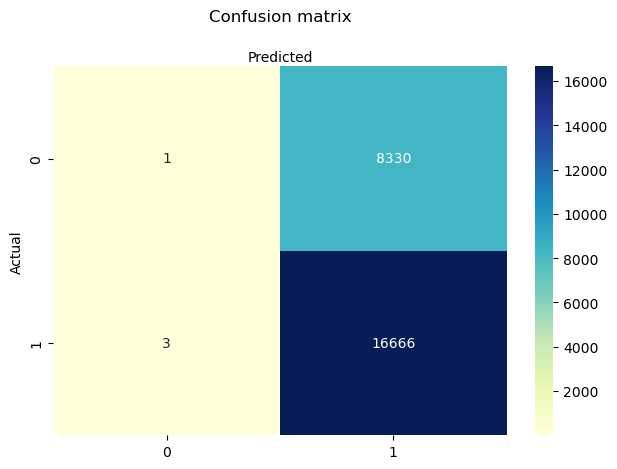

In [65]:
# Visualize the confusion matrix
plt.clf()
# name  of classes
class_names = [0, 1] 
fig, ax = plt.subplots()

tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap='YlGnBu', fmt='g')
ax.xaxis.set_label_position('top')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.tight_layout()
plt.show()

In [67]:
# Evaluation: Calculating Accuracy, Precision, and Recall
print('Accuracy :', accuracy_score(y_test, y_pred))
print('Precision:', precision_score(y_test, y_pred, average='micro'))
print('Recall   :', recall_score(y_test, y_pred, average='micro'))

Accuracy : 0.66668
Precision: 0.66668
Recall   : 0.66668


### Conclusion
___

After exploring the data and building the model with Logistic Regression, the following conclusions can be drawn:
1. The accuracy of the model is quite high, reaching 66.67%, indicating the extent to which the model can correctly classify the data as a whole. However, it should be noted that there are prediction errors in both positive and negative classes.
2. The relatively equal precision and recall of 66.67% also indicates a balance between the model's ability to identify customers who actually churn (precision) and its ability to capture most of the customers who actually churn (recall).
3. Further evaluation, such as threshold adjustment or feature addition, may be needed to improve the model's performance in handling certain prediction errors.